# Intercomparison Campaigns - Interpolate Data

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns.

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [1]:
import pandas
import numpy as np
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import cdsapi, zipfile, os, time

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (10,10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

## Accessing data :

We will interpolate pressure data to compare different sondes, which were all mounted onto the same balloon. <br>
It's not necessary to select the data with the help of 'ListProfiles.xls' - a file for mapping the data of the different sondes to one ascent. <br>
Opening all available data and searching for the matching report_id would be possible too, we want to show you that it's not necessary to load all the data before computing. <br> <br>


__Consider that there is no height information matching the pressure values on early radiosondes.__ <br> <br>


We will select a reference sonde, based on the longest series of measurements.<br>
The pressure data of our reference sonde will be interpolated onto the time - minutes since the ascent start.<br>
With the resulting interpolation funktion we can get the exact moment, when the sonde were on a standard pressure level.<br>
In the second step we will get the pressure value of all the other sondes to that given time. For this process it's necessary to interpolate backwards: time onto pressure.<br>


1956-5-27T9.0:30.0


2020-10-05 08:15:00,398 INFO Welcome to the CDS
2020-10-05 08:15:00,398 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:00,470 INFO Request is completed
2020-10-05 08:15:00,470 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:00,552 INFO Download rate 157K/s
2020-10-05 08:15:00,591 INFO Welcome to the CDS
2020-10-05 08:15:00,592 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-000


2020-10-05 08:15:01,125 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:01,208 INFO Download rate 180.6K/s
2020-10-05 08:15:01,248 INFO Welcome to the CDS
2020-10-05 08:15:01,249 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:01,339 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:01,395 INFO Download rate 220.9K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-000
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-000


2020-10-05 08:15:01,438 INFO Welcome to the CDS
2020-10-05 08:15:01,439 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:01,560 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:01,591 INFO Download rate 423.1K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-000


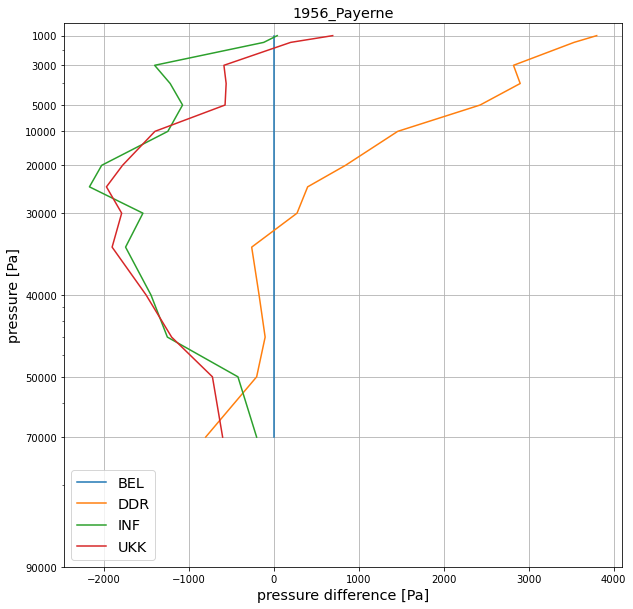

2020-10-05 08:15:02,030 INFO Welcome to the CDS
2020-10-05 08:15:02,031 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:02,090 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:02,121 INFO Download rate 325.7K/s
2020-10-05 08:15:02,162 INFO Welcome to the CDS
2020-10-05 08:15:02,163 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


1956-5-27T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-001


2020-10-05 08:15:02,256 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:02,288 INFO Download rate 509.3K/s
2020-10-05 08:15:02,327 INFO Welcome to the CDS
2020-10-05 08:15:02,328 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:02,466 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-001


2020-10-05 08:15:02,497 INFO Download rate 406K/s
2020-10-05 08:15:02,534 INFO Welcome to the CDS
2020-10-05 08:15:02,535 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:02,649 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:02,680 INFO Download rate 449.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-001
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-001


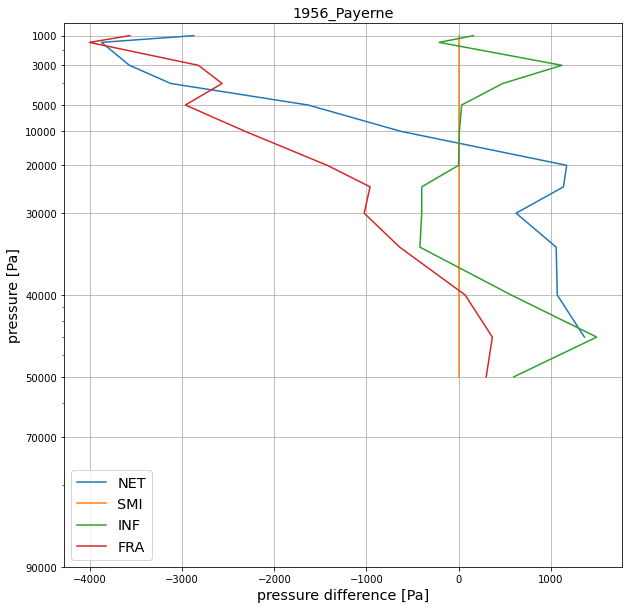

2020-10-05 08:15:03,121 INFO Welcome to the CDS
2020-10-05 08:15:03,122 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:03,173 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:03,229 INFO Download rate 229.7K/s
2020-10-05 08:15:03,266 INFO Welcome to the CDS
2020-10-05 08:15:03,267 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


1956-5-28T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-002


2020-10-05 08:15:03,358 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:03,414 INFO Download rate 340.1K/s
2020-10-05 08:15:03,457 INFO Welcome to the CDS
2020-10-05 08:15:03,458 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:03,543 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:03,574 INFO Download rate 531.2K/s
2020-10-05 08:15:03,615 INFO Welcome to the CDS


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00408-002
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-002


2020-10-05 08:15:03,615 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:03,709 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:03,740 INFO Download rate 331K/s
2020-10-05 08:15:03,780 INFO Welcome to the CDS
2020-10-05 08:15:03,781 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:03,885 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:03,916 INFO Download rate 607.7K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-002
1956-5-28T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-003


2020-10-05 08:15:03,954 INFO Welcome to the CDS
2020-10-05 08:15:03,954 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:04,042 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:04,098 INFO Download rate 267K/s
2020-10-05 08:15:04,136 INFO Welcome to the CDS
2020-10-05 08:15:04,137 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-003


2020-10-05 08:15:04,411 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:04,467 INFO Download rate 248.3K/s
2020-10-05 08:15:04,508 INFO Welcome to the CDS
2020-10-05 08:15:04,509 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:04,621 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:04,652 INFO Download rate 512.6K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-003
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-003
1956-5-28T22.0:0.0


2020-10-05 08:15:04,696 INFO Welcome to the CDS
2020-10-05 08:15:04,697 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:04,853 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:04,884 INFO Download rate 358.4K/s
2020-10-05 08:15:04,925 INFO Welcome to the CDS
2020-10-05 08:15:04,925 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:05,013 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:05,044 INFO Download rate 431.7K/s
2020-10-05 08:15:05,083 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00411-004
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00404-004


2020-10-05 08:15:05,191 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:05,222 INFO Download rate 401.4K/s
2020-10-05 08:15:05,260 INFO Welcome to the CDS
2020-10-05 08:15:05,261 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:05,348 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:05,379 INFO Download rate 444.9K/s
2020-10-05 08:15:05,424 INFO Welcome to the CDS


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-004
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-004
1956-5-29T0.0:30.0


2020-10-05 08:15:05,424 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:05,579 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:05,634 INFO Download rate 239.4K/s
2020-10-05 08:15:05,674 INFO Welcome to the CDS
2020-10-05 08:15:05,674 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:05,771 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:05,802 INFO Download rate 332.1K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00404-005
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00405-005


2020-10-05 08:15:05,837 INFO Welcome to the CDS
2020-10-05 08:15:05,838 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:05,920 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:05,951 INFO Download rate 420.5K/s
2020-10-05 08:15:05,990 INFO Welcome to the CDS
2020-10-05 08:15:05,990 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:06,074 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:06,105 INFO Download rate 462.3K/s
2020-10-05 08:15:06,143 INFO Welcom

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00401-005
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-005
1956-5-29T9.0:0.0


2020-10-05 08:15:06,229 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:06,285 INFO Download rate 264.9K/s
2020-10-05 08:15:06,327 INFO Welcome to the CDS
2020-10-05 08:15:06,328 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:06,413 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:06,469 INFO Download rate 295K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00402-006
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00409-006


2020-10-05 08:15:06,508 INFO Welcome to the CDS
2020-10-05 08:15:06,508 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:06,596 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:06,627 INFO Download rate 450.7K/s
2020-10-05 08:15:06,667 INFO Welcome to the CDS
2020-10-05 08:15:06,668 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:06,752 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:06,783 INFO Download rate 471.2K/s
2020-10-05 08:15:06,826 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-006
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-006
1956-5-29T15.0:0.0


2020-10-05 08:15:06,916 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:06,947 INFO Download rate 538.1K/s
2020-10-05 08:15:06,984 INFO Welcome to the CDS
2020-10-05 08:15:06,985 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:07,070 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:07,101 INFO Download rate 452.4K/s
2020-10-05 08:15:07,140 INFO Welcome to the CDS
2020-10-05 08:15:07,141 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00409-007
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-007


2020-10-05 08:15:07,226 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:07,257 INFO Download rate 455.5K/s
2020-10-05 08:15:07,296 INFO Welcome to the CDS
2020-10-05 08:15:07,296 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:07,382 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:07,413 INFO Download rate 403.7K/s
2020-10-05 08:15:07,453 INFO Welcome to the CDS
2020-10-05 08:15:07,454 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00412-007
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00403-007
1956-5-29T22.0:0.0


2020-10-05 08:15:07,557 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:07,588 INFO Download rate 332.9K/s
2020-10-05 08:15:07,628 INFO Welcome to the CDS
2020-10-05 08:15:07,628 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-008


2020-10-05 08:15:08,455 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:08,511 INFO Download rate 283.2K/s
2020-10-05 08:15:08,548 INFO Welcome to the CDS
2020-10-05 08:15:08,548 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:08,648 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:08,678 INFO Download rate 623K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-008
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-008


2020-10-05 08:15:08,717 INFO Welcome to the CDS
2020-10-05 08:15:08,717 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:08,802 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:08,832 INFO Download rate 362.5K/s
2020-10-05 08:15:08,873 INFO Welcome to the CDS
2020-10-05 08:15:08,873 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:08,961 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:08,992 INFO Download rate 515.5K/s
2020-10-05 08:15:09,032 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-008
1956-5-30T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-009


2020-10-05 08:15:09,115 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:09,146 INFO Download rate 477K/s
2020-10-05 08:15:09,183 INFO Welcome to the CDS
2020-10-05 08:15:09,183 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:09,324 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00413-009


2020-10-05 08:15:09,380 INFO Download rate 266.5K/s
2020-10-05 08:15:09,421 INFO Welcome to the CDS
2020-10-05 08:15:09,422 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:09,515 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:09,570 INFO Download rate 238.7K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-009
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-009
1956-5-30T9.0:0.0


2020-10-05 08:15:09,608 INFO Welcome to the CDS
2020-10-05 08:15:09,609 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:09,693 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:09,724 INFO Download rate 450.9K/s
2020-10-05 08:15:09,762 INFO Welcome to the CDS
2020-10-05 08:15:09,763 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:09,866 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:09,897 INFO Download rate 446.7K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-010
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-010


2020-10-05 08:15:09,935 INFO Welcome to the CDS
2020-10-05 08:15:09,936 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:10,042 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:10,073 INFO Download rate 363.3K/s
2020-10-05 08:15:10,108 INFO Welcome to the CDS
2020-10-05 08:15:10,109 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:10,195 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:10,226 INFO Download rate 419.5K/s
2020-10-05 08:15:10,264 INFO Welcom

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-010
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00401-010
1956-5-30T15.0:0.0


2020-10-05 08:15:10,369 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:10,400 INFO Download rate 446.8K/s
2020-10-05 08:15:10,439 INFO Welcome to the CDS
2020-10-05 08:15:10,439 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:10,544 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:10,574 INFO Download rate 461.3K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00407-011
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-011


2020-10-05 08:15:10,616 INFO Welcome to the CDS
2020-10-05 08:15:10,616 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:10,704 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:10,735 INFO Download rate 435.8K/s
2020-10-05 08:15:10,771 INFO Welcome to the CDS
2020-10-05 08:15:10,772 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:10,884 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
  0%|          | 0.00/18.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-011


2020-10-05 08:15:10,940 INFO Download rate 336.8K/s
2020-10-05 08:15:10,982 INFO Welcome to the CDS
2020-10-05 08:15:10,982 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:11,078 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:11,109 INFO Download rate 472.4K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00408-011
1956-5-30T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-012


2020-10-05 08:15:11,147 INFO Welcome to the CDS
2020-10-05 08:15:11,148 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:11,235 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:11,266 INFO Download rate 400.9K/s
2020-10-05 08:15:11,307 INFO Welcome to the CDS
2020-10-05 08:15:11,308 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:11,417 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:11,448 INFO Download rate 539.2K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-012
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-012


2020-10-05 08:15:11,487 INFO Welcome to the CDS
2020-10-05 08:15:11,488 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:11,576 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:11,606 INFO Download rate 336K/s
2020-10-05 08:15:11,644 INFO Welcome to the CDS
2020-10-05 08:15:11,645 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:11,756 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:11,787 INFO Download rate 410.5K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-012
1956-5-31T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00403-013


2020-10-05 08:15:11,823 INFO Welcome to the CDS
2020-10-05 08:15:11,823 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:11,909 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:11,939 INFO Download rate 423.9K/s
2020-10-05 08:15:11,976 INFO Welcome to the CDS
2020-10-05 08:15:11,977 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:12,077 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:12,108 INFO Download rate 452.3K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00401-013
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-013


2020-10-05 08:15:12,148 INFO Welcome to the CDS
2020-10-05 08:15:12,149 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:12,236 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:12,266 INFO Download rate 518.8K/s
2020-10-05 08:15:12,307 INFO Welcome to the CDS
2020-10-05 08:15:12,307 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:12,393 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:12,424 INFO Download rate 458.9K/s
2020-10-05 08:15:12,462 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-013
1956-5-31T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-014


2020-10-05 08:15:12,549 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:12,579 INFO Download rate 363.7K/s
2020-10-05 08:15:12,618 INFO Welcome to the CDS
2020-10-05 08:15:12,619 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:12,706 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:12,737 INFO Download rate 334.1K/s
2020-10-05 08:15:12,773 INFO Welcome to the CDS
2020-10-05 08:15:12,773 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-014
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-014


2020-10-05 08:15:12,869 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:12,925 INFO Download rate 266.1K/s
2020-10-05 08:15:12,983 INFO Welcome to the CDS
2020-10-05 08:15:12,983 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:13,086 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:13,117 INFO Download rate 362.9K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00402-014
1956-5-31T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00411-015


2020-10-05 08:15:13,158 INFO Welcome to the CDS
2020-10-05 08:15:13,158 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:13,265 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:13,296 INFO Download rate 428.7K/s
2020-10-05 08:15:13,337 INFO Welcome to the CDS
2020-10-05 08:15:13,338 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:13,433 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:13,464 INFO Download rate 520.5K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00404-015
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00406-015


2020-10-05 08:15:13,505 INFO Welcome to the CDS
2020-10-05 08:15:13,506 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:13,594 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:13,624 INFO Download rate 541.3K/s
2020-10-05 08:15:13,661 INFO Welcome to the CDS
2020-10-05 08:15:13,661 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:13,747 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:13,778 INFO Download rate 417.5K/s
2020-10-05 08:15:13,814 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00409-015
1956-5-31T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-016


2020-10-05 08:15:13,902 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:13,958 INFO Download rate 336.7K/s
2020-10-05 08:15:13,997 INFO Welcome to the CDS
2020-10-05 08:15:13,997 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:14,085 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:14,116 INFO Download rate 452.7K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00408-016
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-016


2020-10-05 08:15:14,238 INFO Welcome to the CDS
2020-10-05 08:15:14,239 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:14,342 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:14,397 INFO Download rate 261.9K/s
2020-10-05 08:15:14,440 INFO Welcome to the CDS
2020-10-05 08:15:14,441 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:14,529 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:14,584 INFO Download rate 344.1K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-016
1956-6-1T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-017


2020-10-05 08:15:14,622 INFO Welcome to the CDS
2020-10-05 08:15:14,623 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:14,716 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:14,772 INFO Download rate 264.8K/s
2020-10-05 08:15:14,812 INFO Welcome to the CDS
2020-10-05 08:15:14,813 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:14,942 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
  0%|          | 0.00/13.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-017


2020-10-05 08:15:15,001 INFO Download rate 237.7K/s
2020-10-05 08:15:15,039 INFO Welcome to the CDS
2020-10-05 08:15:15,040 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:15,127 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:15,157 INFO Download rate 410.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00412-017
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00403-017
1956-6-1T9.0:0.0


2020-10-05 08:15:15,205 INFO Welcome to the CDS
2020-10-05 08:15:15,205 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:15,291 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:15,321 INFO Download rate 437.4K/s
2020-10-05 08:15:15,361 INFO Welcome to the CDS
2020-10-05 08:15:15,361 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:15,499 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00404-018


2020-10-05 08:15:15,530 INFO Download rate 334.3K/s
2020-10-05 08:15:15,569 INFO Welcome to the CDS
2020-10-05 08:15:15,570 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:15,662 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:15,693 INFO Download rate 471.8K/s
2020-10-05 08:15:15,730 INFO Welcome to the CDS
2020-10-05 08:15:15,731 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00405-018
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00413-018


2020-10-05 08:15:15,906 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:15,961 INFO Download rate 250.5K/s
2020-10-05 08:15:16,006 INFO Welcome to the CDS
2020-10-05 08:15:16,007 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:16,091 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:16,122 INFO Download rate 335.5K/s
2020-10-05 08:15:16,162 INFO Welcome to the CDS


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00410-018
1956-6-1T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-019


2020-10-05 08:15:16,162 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:16,259 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:16,290 INFO Download rate 512.7K/s
2020-10-05 08:15:16,329 INFO Welcome to the CDS
2020-10-05 08:15:16,330 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:16,419 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:16,450 INFO Download rate 403.7K/s
2020-10-05 08:15:16,488 INFO Welcome to the CDS
2020-10-05 08:15:16,489 INFO Sending

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-019
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-019


2020-10-05 08:15:16,579 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:16,609 INFO Download rate 452.3K/s
2020-10-05 08:15:16,653 INFO Welcome to the CDS
2020-10-05 08:15:16,653 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:16,768 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
  0%|          | 0.00/14.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-019
1956-6-1T22.0:0.0


2020-10-05 08:15:16,824 INFO Download rate 267.2K/s
2020-10-05 08:15:16,867 INFO Welcome to the CDS
2020-10-05 08:15:16,867 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:16,954 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:17,009 INFO Download rate 298.8K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00402-020
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00409-020


2020-10-05 08:15:17,048 INFO Welcome to the CDS
2020-10-05 08:15:17,048 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:17,136 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:17,166 INFO Download rate 366.7K/s
2020-10-05 08:15:17,201 INFO Welcome to the CDS
2020-10-05 08:15:17,202 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:17,286 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:17,317 INFO Download rate 421.1K/s
2020-10-05 08:15:17,363 INFO Welcom

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-020
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00401-020
1956-6-2T0.0:30.0


2020-10-05 08:15:17,453 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:17,484 INFO Download rate 538K/s
2020-10-05 08:15:17,522 INFO Welcome to the CDS
2020-10-05 08:15:17,522 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:17,619 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:17,650 INFO Download rate 451.7K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00409-021
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-021


2020-10-05 08:15:17,692 INFO Welcome to the CDS
2020-10-05 08:15:17,692 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:17,777 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:17,808 INFO Download rate 433.5K/s
2020-10-05 08:15:17,844 INFO Welcome to the CDS
2020-10-05 08:15:17,845 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:17,933 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:17,963 INFO Download rate 624.8K/s
2020-10-05 08:15:18,007 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-021
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00408-021
1959-6-2T15.0:0.0


2020-10-05 08:15:18,146 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:18,177 INFO Download rate 621.3K/s
2020-10-05 08:15:18,215 INFO Welcome to the CDS
2020-10-05 08:15:18,215 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:18,334 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
  0%|          | 0.00/14.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-022


2020-10-05 08:15:18,390 INFO Download rate 266.4K/s
2020-10-05 08:15:18,428 INFO Welcome to the CDS
2020-10-05 08:15:18,428 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:18,520 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:18,575 INFO Download rate 249.9K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-022
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-022


2020-10-05 08:15:18,616 INFO Welcome to the CDS
2020-10-05 08:15:18,617 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:18,733 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:18,763 INFO Download rate 514.6K/s
2020-10-05 08:15:18,810 INFO Welcome to the CDS
2020-10-05 08:15:18,811 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:18,916 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:18,946 INFO Download rate 475.9K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-022
1956-6-4T0.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-023


2020-10-05 08:15:18,985 INFO Welcome to the CDS
2020-10-05 08:15:18,986 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:19,148 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:19,204 INFO Download rate 223.4K/s
2020-10-05 08:15:19,247 INFO Welcome to the CDS
2020-10-05 08:15:19,248 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:19,334 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:19,365 INFO Download rate 538.7K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-023
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-023


2020-10-05 08:15:19,427 INFO Welcome to the CDS
2020-10-05 08:15:19,427 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:19,537 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:19,568 INFO Download rate 336.7K/s
2020-10-05 08:15:19,614 INFO Welcome to the CDS
2020-10-05 08:15:19,615 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:19,701 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:19,732 INFO Download rate 515K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-023
1956-6-4T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-024


2020-10-05 08:15:19,773 INFO Welcome to the CDS
2020-10-05 08:15:19,773 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:19,865 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:19,896 INFO Download rate 472.5K/s
2020-10-05 08:15:19,932 INFO Welcome to the CDS
2020-10-05 08:15:19,932 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:20,025 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:20,056 INFO Download rate 417.2K/s
2020-10-05 08:15:20,095 INFO Welcom

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00413-024
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00401-024


2020-10-05 08:15:20,205 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:20,235 INFO Download rate 463.5K/s
2020-10-05 08:15:20,282 INFO Welcome to the CDS
2020-10-05 08:15:20,282 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-024
1956-6-4T15.0:0.0


2020-10-05 08:15:20,857 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:20,913 INFO Download rate 258K/s
2020-10-05 08:15:20,952 INFO Welcome to the CDS
2020-10-05 08:15:20,952 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:21,039 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:21,070 INFO Download rate 407.7K/s
2020-10-05 08:15:21,106 INFO Welcome to the CDS
2020-10-05 08:15:21,106 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-025
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-025


2020-10-05 08:15:21,195 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:21,226 INFO Download rate 620.4K/s
2020-10-05 08:15:21,290 INFO Welcome to the CDS
2020-10-05 08:15:21,290 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:21,376 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:21,407 INFO Download rate 359.5K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-025
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-025
1956-6-4T22.0:0.0


2020-10-05 08:15:21,451 INFO Welcome to the CDS
2020-10-05 08:15:21,451 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:21,540 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:21,572 INFO Download rate 443.7K/s
2020-10-05 08:15:21,609 INFO Welcome to the CDS
2020-10-05 08:15:21,610 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:21,734 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:21,765 INFO Download rate 451.9K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-026
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-026


2020-10-05 08:15:21,805 INFO Welcome to the CDS
2020-10-05 08:15:21,805 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:21,899 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:21,930 INFO Download rate 336.7K/s
2020-10-05 08:15:21,966 INFO Welcome to the CDS
2020-10-05 08:15:21,966 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:22,059 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:22,115 INFO Download rate 267.7K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-026
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00402-026
1956-6-5T0.0:30.0


2020-10-05 08:15:22,159 INFO Welcome to the CDS
2020-10-05 08:15:22,160 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:22,292 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:22,347 INFO Download rate 247.6K/s
2020-10-05 08:15:22,386 INFO Welcome to the CDS
2020-10-05 08:15:22,387 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:22,474 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
  0%|          | 0.00/13.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00407-027


2020-10-05 08:15:22,555 INFO Download rate 171.6K/s
2020-10-05 08:15:22,596 INFO Welcome to the CDS
2020-10-05 08:15:22,597 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:22,685 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:22,716 INFO Download rate 509.3K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-027
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00406-027


2020-10-05 08:15:22,780 INFO Welcome to the CDS
2020-10-05 08:15:22,780 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:22,870 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:22,901 INFO Download rate 538.2K/s
2020-10-05 08:15:22,946 INFO Welcome to the CDS
2020-10-05 08:15:22,946 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:23,034 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:23,065 INFO Download rate 407.5K/s
2020-10-05 08:15:23,100 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00409-027
1956-6-5T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00403-028


2020-10-05 08:15:23,192 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:23,222 INFO Download rate 426K/s
2020-10-05 08:15:23,259 INFO Welcome to the CDS
2020-10-05 08:15:23,259 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:23,361 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:23,417 INFO Download rate 265.6K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00401-028
Unzipping retrieved files: to ./exampla_data/5/2


2020-10-05 08:15:23,473 INFO Welcome to the CDS
2020-10-05 08:15:23,473 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:23,583 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:23,638 INFO Download rate 240.5K/s


0-20100-0-00402-028
Unzipping retrieved files: to ./exampla_data/5/3


2020-10-05 08:15:23,690 INFO Welcome to the CDS
2020-10-05 08:15:23,691 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:23,777 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:23,808 INFO Download rate 329K/s
2020-10-05 08:15:23,850 INFO Welcome to the CDS
2020-10-05 08:15:23,851 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00404-028
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00414-028
1956-6-5T15.0:0.0


2020-10-05 08:15:23,970 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:24,002 INFO Download rate 398K/s
2020-10-05 08:15:24,038 INFO Welcome to the CDS
2020-10-05 08:15:24,039 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:24,148 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
                                           

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-029


2020-10-05 08:15:24,204 INFO Download rate 340.9K/s
2020-10-05 08:15:24,246 INFO Welcome to the CDS
2020-10-05 08:15:24,247 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:24,338 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:24,369 INFO Download rate 539.7K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00408-029
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-029


2020-10-05 08:15:24,419 INFO Welcome to the CDS
2020-10-05 08:15:24,420 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:24,571 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:24,602 INFO Download rate 335.3K/s
2020-10-05 08:15:24,657 INFO Welcome to the CDS
2020-10-05 08:15:24,657 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-029
1956-6-5T22.0:0.0


2020-10-05 08:15:24,845 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:24,901 INFO Download rate 252.5K/s
2020-10-05 08:15:24,939 INFO Welcome to the CDS
2020-10-05 08:15:24,940 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:25,023 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:25,054 INFO Download rate 362.2K/s
2020-10-05 08:15:25,093 INFO Welcome to the CDS
2020-10-05 08:15:25,094 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-030
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-030


2020-10-05 08:15:25,176 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:25,206 INFO Download rate 475.2K/s
2020-10-05 08:15:25,244 INFO Welcome to the CDS
2020-10-05 08:15:25,244 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:25,333 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:25,364 INFO Download rate 453.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00413-030
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00410-030
1956-6-6T0.0:30.0


2020-10-05 08:15:25,410 INFO Welcome to the CDS
2020-10-05 08:15:25,411 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:25,515 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:25,546 INFO Download rate 360.4K/s
2020-10-05 08:15:25,586 INFO Welcome to the CDS
2020-10-05 08:15:25,586 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:25,670 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:25,701 INFO Download rate 436.3K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00411-031
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00404-031


2020-10-05 08:15:25,762 INFO Welcome to the CDS
2020-10-05 08:15:25,762 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:25,860 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:25,891 INFO Download rate 408K/s
2020-10-05 08:15:25,928 INFO Welcome to the CDS
2020-10-05 08:15:25,929 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:26,013 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:26,044 INFO Download rate 447.6K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-031
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-031
1956-6-6T9.0:0.0


2020-10-05 08:15:26,110 INFO Welcome to the CDS
2020-10-05 08:15:26,111 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:26,195 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:26,251 INFO Download rate 336.4K/s
2020-10-05 08:15:26,288 INFO Welcome to the CDS
2020-10-05 08:15:26,288 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:26,373 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:26,428 INFO Download rate 269.4K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-032
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-032


2020-10-05 08:15:26,466 INFO Welcome to the CDS
2020-10-05 08:15:26,466 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:26,553 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:26,607 INFO Download rate 252.3K/s
2020-10-05 08:15:26,662 INFO Welcome to the CDS
2020-10-05 08:15:26,662 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-032


2020-10-05 08:15:26,832 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:26,887 INFO Download rate 282.8K/s
2020-10-05 08:15:26,944 INFO Welcome to the CDS
2020-10-05 08:15:26,945 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-032


2020-10-05 08:15:27,137 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:27,167 INFO Download rate 330.5K/s
2020-10-05 08:15:27,211 INFO Welcome to the CDS
2020-10-05 08:15:27,211 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:27,310 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:27,365 INFO Download rate 269.3K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00414-032
1956-6-6T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-10-05 08:15:27,419 INFO Welcome to the CDS
2020-10-05 08:15:27,420 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:27,548 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
  0%|          | 0.00/16.2k [00:00<?, ?B/s]

0-20100-0-00402-033


2020-10-05 08:15:27,603 INFO Download rate 297.8K/s
2020-10-05 08:15:27,641 INFO Welcome to the CDS
2020-10-05 08:15:27,641 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:27,726 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:27,757 INFO Download rate 452.2K/s
2020-10-05 08:15:27,797 INFO Welcome to the CDS
2020-10-05 08:15:27,797 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00409-033
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-033


2020-10-05 08:15:27,911 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:27,941 INFO Download rate 474.1K/s
2020-10-05 08:15:28,000 INFO Welcome to the CDS
2020-10-05 08:15:28,000 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:28,132 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-033


2020-10-05 08:15:28,162 INFO Download rate 333.3K/s
2020-10-05 08:15:28,210 INFO Welcome to the CDS
2020-10-05 08:15:28,210 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:28,297 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:28,327 INFO Download rate 441.1K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00414-033
1956-6-6T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00404-034


2020-10-05 08:15:28,366 INFO Welcome to the CDS
2020-10-05 08:15:28,366 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:28,482 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:28,512 INFO Download rate 338.6K/s
2020-10-05 08:15:28,548 INFO Welcome to the CDS
2020-10-05 08:15:28,548 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:28,634 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:28,665 INFO Download rate 419.8K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00405-034
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00401-034


2020-10-05 08:15:28,718 INFO Welcome to the CDS
2020-10-05 08:15:28,719 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:28,818 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:28,849 INFO Download rate 458.7K/s
2020-10-05 08:15:28,894 INFO Welcome to the CDS
2020-10-05 08:15:28,894 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:28,979 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:29,009 INFO Download rate 335.7K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-034
1956-6-7T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-035


2020-10-05 08:15:29,062 INFO Welcome to the CDS
2020-10-05 08:15:29,063 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:29,149 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:29,179 INFO Download rate 522.3K/s
2020-10-05 08:15:29,216 INFO Welcome to the CDS
2020-10-05 08:15:29,217 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:29,301 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:29,331 INFO Download rate 625.1K/s
2020-10-05 08:15:29,370 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-035
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-035


2020-10-05 08:15:29,462 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:29,492 INFO Download rate 366.6K/s
2020-10-05 08:15:29,534 INFO Welcome to the CDS
2020-10-05 08:15:29,535 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:29,621 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:29,651 INFO Download rate 538.5K/s
2020-10-05 08:15:29,689 INFO Welcome to the CDS
2020-10-05 08:15:29,690 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-035
1956-6-7T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00409-036


2020-10-05 08:15:29,776 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:29,806 INFO Download rate 453K/s
2020-10-05 08:15:29,846 INFO Welcome to the CDS
2020-10-05 08:15:29,846 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:29,931 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:29,962 INFO Download rate 460.2K/s
2020-10-05 08:15:30,001 INFO Welcome to the CDS
2020-10-05 08:15:30,002 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-036
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00412-036


2020-10-05 08:15:30,087 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:30,118 INFO Download rate 409.3K/s
2020-10-05 08:15:30,154 INFO Welcome to the CDS
2020-10-05 08:15:30,155 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:30,241 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:30,271 INFO Download rate 620.6K/s
2020-10-05 08:15:30,316 INFO Welcome to the CDS
2020-10-05 08:15:30,317 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00403-036
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00408-036
1956-6-7T15.0:0.0


2020-10-05 08:15:30,401 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:30,432 INFO Download rate 454.2K/s
2020-10-05 08:15:30,469 INFO Welcome to the CDS
2020-10-05 08:15:30,470 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:30,555 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:30,586 INFO Download rate 452.2K/s
2020-10-05 08:15:30,622 INFO Welcome to the CDS
2020-10-05 08:15:30,623 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-037
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-037


2020-10-05 08:15:30,712 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:30,743 INFO Download rate 624.8K/s
2020-10-05 08:15:30,782 INFO Welcome to the CDS
2020-10-05 08:15:30,782 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:30,883 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:30,914 INFO Download rate 361.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-037
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-037


2020-10-05 08:15:30,949 INFO Welcome to the CDS
2020-10-05 08:15:30,950 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:31,037 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:31,068 INFO Download rate 426.5K/s
2020-10-05 08:15:31,115 INFO Welcome to the CDS
2020-10-05 08:15:31,115 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:31,199 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:31,229 INFO Download rate 521.2K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00401-037
1956-6-7T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-038


2020-10-05 08:15:31,270 INFO Welcome to the CDS
2020-10-05 08:15:31,271 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:31,354 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:31,384 INFO Download rate 475.1K/s
2020-10-05 08:15:31,422 INFO Welcome to the CDS
2020-10-05 08:15:31,422 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:31,516 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:31,571 INFO Download rate 269.4K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00413-038
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-038


2020-10-05 08:15:31,613 INFO Welcome to the CDS
2020-10-05 08:15:31,613 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:31,703 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:31,758 INFO Download rate 240.5K/s
2020-10-05 08:15:31,799 INFO Welcome to the CDS
2020-10-05 08:15:31,800 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:31,888 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:31,919 INFO Download rate 464.2K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-038
1956-6-8T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-039


2020-10-05 08:15:31,960 INFO Welcome to the CDS
2020-10-05 08:15:31,961 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:32,081 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:32,112 INFO Download rate 406.2K/s
2020-10-05 08:15:32,155 INFO Welcome to the CDS
2020-10-05 08:15:32,156 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:32,240 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:32,271 INFO Download rate 539.5K/s
2020-10-05 08:15:32,311 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-039
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-039


2020-10-05 08:15:32,397 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:32,428 INFO Download rate 338.9K/s
2020-10-05 08:15:32,465 INFO Welcome to the CDS
2020-10-05 08:15:32,465 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:32,554 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:32,584 INFO Download rate 453.1K/s
2020-10-05 08:15:32,624 INFO Welcome to the CDS
2020-10-05 08:15:32,624 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-039
1956-6-8T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00407-040


2020-10-05 08:15:32,712 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:32,742 INFO Download rate 461.9K/s
2020-10-05 08:15:32,866 INFO Welcome to the CDS
2020-10-05 08:15:32,866 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-040


2020-10-05 08:15:32,950 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:33,005 INFO Download rate 239.4K/s
2020-10-05 08:15:33,041 INFO Welcome to the CDS
2020-10-05 08:15:33,042 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:33,124 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:33,156 INFO Download rate 581.8K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-040
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00408-040
1956-6-8T15.0:0.0


2020-10-05 08:15:33,236 INFO Welcome to the CDS
2020-10-05 08:15:33,237 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:33,369 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:33,424 INFO Download rate 254.4K/s
2020-10-05 08:15:33,462 INFO Welcome to the CDS
2020-10-05 08:15:33,463 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:33,574 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:33,604 INFO Download rate 364.1K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-041
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-041


2020-10-05 08:15:33,643 INFO Welcome to the CDS
2020-10-05 08:15:33,644 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:33,739 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:33,769 INFO Download rate 337.8K/s
2020-10-05 08:15:33,805 INFO Welcome to the CDS
2020-10-05 08:15:33,806 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:33,892 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:33,948 INFO Download rate 266.2K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-041
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00402-041


2020-10-05 08:15:33,989 INFO Welcome to the CDS
2020-10-05 08:15:33,990 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:34,075 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:34,130 INFO Download rate 298.1K/s
2020-10-05 08:15:34,166 INFO Welcome to the CDS
2020-10-05 08:15:34,167 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:34,273 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:34,328 INFO Download rate 344.7K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00409-041
Unzipping retrieved files: to ./exampla_data/5/5


2020-10-05 08:15:34,377 INFO Welcome to the CDS
2020-10-05 08:15:34,378 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:34,464 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:34,495 INFO Download rate 471.6K/s
2020-10-05 08:15:34,532 INFO Welcome to the CDS
2020-10-05 08:15:34,532 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00408-041
1956-6-8T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-042


2020-10-05 08:15:34,624 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:34,680 INFO Download rate 268.8K/s
2020-10-05 08:15:34,718 INFO Welcome to the CDS
2020-10-05 08:15:34,719 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:34,805 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:34,837 INFO Download rate 355K/s
2020-10-05 08:15:34,873 INFO Welcome to the CDS
2020-10-05 08:15:34,874 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-042
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-042


2020-10-05 08:15:35,009 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:35,039 INFO Download rate 450.9K/s
2020-10-05 08:15:35,080 INFO Welcome to the CDS
2020-10-05 08:15:35,081 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:35,170 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:35,200 INFO Download rate 521.8K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-042
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00406-042


2020-10-05 08:15:35,241 INFO Welcome to the CDS
2020-10-05 08:15:35,242 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:35,329 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:35,360 INFO Download rate 435.7K/s
2020-10-05 08:15:35,398 INFO Welcome to the CDS
2020-10-05 08:15:35,399 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:35,542 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00404-042


2020-10-05 08:15:35,573 INFO Download rate 410.8K/s
2020-10-05 08:15:35,614 INFO Welcome to the CDS
2020-10-05 08:15:35,614 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:35,715 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:35,745 INFO Download rate 542.1K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00403-042
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00409-042


2020-10-05 08:15:35,782 INFO Welcome to the CDS
2020-10-05 08:15:35,782 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:35,868 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:35,924 INFO Download rate 337.5K/s
2020-10-05 08:15:35,971 INFO Welcome to the CDS
2020-10-05 08:15:35,972 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:36,061 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:36,091 INFO Download rate 426.6K/s


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00408-042
1956-6-9T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-043


2020-10-05 08:15:36,128 INFO Welcome to the CDS
2020-10-05 08:15:36,129 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:36,213 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:36,243 INFO Download rate 457.2K/s
2020-10-05 08:15:36,280 INFO Welcome to the CDS
2020-10-05 08:15:36,281 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:36,365 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:36,421 INFO Download rate 268.3K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-043
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-043


2020-10-05 08:15:36,459 INFO Welcome to the CDS
2020-10-05 08:15:36,460 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:36,545 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:36,576 INFO Download rate 362.6K/s
2020-10-05 08:15:36,613 INFO Welcome to the CDS
2020-10-05 08:15:36,614 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:36,699 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:36,730 INFO Download rate 448.7K/s
2020-10-05 08:15:36,770 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-043
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00407-043


2020-10-05 08:15:36,858 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:36,889 INFO Download rate 474.3K/s
2020-10-05 08:15:36,930 INFO Welcome to the CDS
2020-10-05 08:15:36,931 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:37,015 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:37,045 INFO Download rate 543.5K/s
2020-10-05 08:15:37,082 INFO Welcome to the CDS
2020-10-05 08:15:37,082 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00413-043
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00409-043


2020-10-05 08:15:37,313 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:37,369 INFO Download rate 336K/s
2020-10-05 08:15:37,417 INFO Welcome to the CDS
2020-10-05 08:15:37,418 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:37,507 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:37,563 INFO Download rate 268.5K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00408-043
1956-6-9T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00402-044

2020-10-05 08:15:37,601 INFO Welcome to the CDS
2020-10-05 08:15:37,602 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:37,703 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:37,734 INFO Download rate 358.8K/s
2020-10-05 08:15:37,772 INFO Welcome to the CDS
2020-10-05 08:15:37,773 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network



Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-044


2020-10-05 08:15:37,863 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:37,893 INFO Download rate 339.1K/s
2020-10-05 08:15:37,932 INFO Welcome to the CDS
2020-10-05 08:15:37,933 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:38,022 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:38,052 INFO Download rate 469.8K/s
2020-10-05 08:15:38,091 INFO Welcome to the CDS
2020-10-05 08:15:38,091 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-044
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-044


2020-10-05 08:15:38,181 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:38,212 INFO Download rate 409.9K/s
2020-10-05 08:15:38,248 INFO Welcome to the CDS
2020-10-05 08:15:38,248 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:38,338 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:38,368 INFO Download rate 428.9K/s
2020-10-05 08:15:38,409 INFO Welcome to the CDS
2020-10-05 08:15:38,410 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00403-044
Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00401-044


2020-10-05 08:15:38,496 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:38,527 INFO Download rate 542.3K/s
2020-10-05 08:15:38,563 INFO Welcome to the CDS
2020-10-05 08:15:38,564 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:38,649 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:38,679 INFO Download rate 626.8K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00409-044
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00408-044
1956-6-11Tnan:nan


2020-10-05 08:15:38,733 INFO Welcome to the CDS
2020-10-05 08:15:38,734 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:38,899 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:38,954 INFO Download rate 251.8K/s
2020-10-05 08:15:38,993 INFO Welcome to the CDS
2020-10-05 08:15:38,994 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:39,080 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:39,111 INFO Download rate 462.9K/s
2020-10-05 08:15:39,152 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-045
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-045


2020-10-05 08:15:39,241 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:39,271 INFO Download rate 435.8K/s
2020-10-05 08:15:39,311 INFO Welcome to the CDS
2020-10-05 08:15:39,311 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:39,397 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:39,427 INFO Download rate 340.2K/s
2020-10-05 08:15:39,466 INFO Welcome to the CDS
2020-10-05 08:15:39,466 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-045
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-045


2020-10-05 08:15:39,553 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:39,583 INFO Download rate 479.2K/s
2020-10-05 08:15:39,621 INFO Welcome to the CDS
2020-10-05 08:15:39,622 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:39,711 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:39,741 INFO Download rate 408.2K/s
2020-10-05 08:15:39,783 INFO Welcome to the CDS
2020-10-05 08:15:39,784 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00413-045
Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00403-045


2020-10-05 08:15:39,870 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:39,901 INFO Download rate 540.8K/s
2020-10-05 08:15:39,937 INFO Welcome to the CDS
2020-10-05 08:15:39,938 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:40,025 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:40,080 INFO Download rate 338.1K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00409-045
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00408-045
1956-6-11Tnan:nan


2020-10-05 08:15:40,124 INFO Welcome to the CDS
2020-10-05 08:15:40,124 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:40,209 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:40,240 INFO Download rate 424.1K/s
2020-10-05 08:15:40,278 INFO Welcome to the CDS
2020-10-05 08:15:40,278 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:40,364 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:40,394 INFO Download rate 364.7K/s
2020-10-05 08:15:40,431 INFO Welcom

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-046
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-046


2020-10-05 08:15:40,515 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:40,546 INFO Download rate 445.1K/s
2020-10-05 08:15:40,584 INFO Welcome to the CDS
2020-10-05 08:15:40,585 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:40,700 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:40,731 INFO Download rate 460.2K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-046
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-046


2020-10-05 08:15:40,768 INFO Welcome to the CDS
2020-10-05 08:15:40,768 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:40,864 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:40,920 INFO Download rate 267.8K/s
2020-10-05 08:15:40,960 INFO Welcome to the CDS
2020-10-05 08:15:40,961 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:41,087 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
  0%|          | 0.00/15.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-046


2020-10-05 08:15:41,143 INFO Download rate 284.6K/s
2020-10-05 08:15:41,182 INFO Welcome to the CDS
2020-10-05 08:15:41,182 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:41,281 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:41,312 INFO Download rate 331.1K/s


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-046
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-046


2020-10-05 08:15:41,352 INFO Welcome to the CDS
2020-10-05 08:15:41,352 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:41,438 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:41,469 INFO Download rate 472.2K/s
2020-10-05 08:15:41,511 INFO Welcome to the CDS
2020-10-05 08:15:41,512 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:41,598 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:41,628 INFO Download rate 442.7K/s
2020-10-05 08:15:41,667 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-046
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-046


2020-10-05 08:15:41,753 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:41,784 INFO Download rate 411.7K/s
2020-10-05 08:15:41,821 INFO Welcome to the CDS
2020-10-05 08:15:41,821 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:41,973 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-046


2020-10-05 08:15:42,055 INFO Download rate 168.6K/s
2020-10-05 08:15:42,095 INFO Welcome to the CDS
2020-10-05 08:15:42,095 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:42,180 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:42,210 INFO Download rate 334.3K/s
2020-10-05 08:15:42,245 INFO Welcome to the CDS
2020-10-05 08:15:42,246 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-046
Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-046


2020-10-05 08:15:42,336 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:42,392 INFO Download rate 341.8K/s
2020-10-05 08:15:42,434 INFO Welcome to the CDS
2020-10-05 08:15:42,434 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:42,520 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:42,550 INFO Download rate 538.6K/s


Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00408-046
Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00409-046
1956-6-11Tnan:nan


2020-10-05 08:15:42,606 INFO Welcome to the CDS
2020-10-05 08:15:42,606 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:42,724 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:42,754 INFO Download rate 421.9K/s
2020-10-05 08:15:42,792 INFO Welcome to the CDS
2020-10-05 08:15:42,793 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:42,878 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:42,909 INFO Download rate 362K/s
2020-10-05 08:15:42,946 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-047
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-047


2020-10-05 08:15:43,041 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:43,073 INFO Download rate 442.1K/s
2020-10-05 08:15:43,113 INFO Welcome to the CDS
2020-10-05 08:15:43,113 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:43,201 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:43,232 INFO Download rate 456.8K/s
2020-10-05 08:15:43,270 INFO Welcome to the CDS
2020-10-05 08:15:43,270 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-047
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-047


2020-10-05 08:15:43,357 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:43,413 INFO Download rate 266.1K/s
2020-10-05 08:15:43,454 INFO Welcome to the CDS
2020-10-05 08:15:43,455 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:43,565 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
  0%|          | 0.00/15.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-047


2020-10-05 08:15:43,620 INFO Download rate 285.1K/s
2020-10-05 08:15:43,660 INFO Welcome to the CDS
2020-10-05 08:15:43,660 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:43,751 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:43,782 INFO Download rate 336.4K/s
2020-10-05 08:15:43,821 INFO Welcome to the CDS


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-047
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-047


2020-10-05 08:15:43,821 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:43,911 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:43,942 INFO Download rate 465.6K/s
2020-10-05 08:15:43,983 INFO Welcome to the CDS
2020-10-05 08:15:43,984 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:44,088 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:44,118 INFO Download rate 437.6K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-047
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-047


2020-10-05 08:15:44,157 INFO Welcome to the CDS
2020-10-05 08:15:44,157 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:44,241 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:44,271 INFO Download rate 412.7K/s
2020-10-05 08:15:44,308 INFO Welcome to the CDS
2020-10-05 08:15:44,309 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:44,392 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:44,422 INFO Download rate 455.5K/s
2020-10-05 08:15:44,462 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-047
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-047


2020-10-05 08:15:44,628 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:44,659 INFO Download rate 328.6K/s
2020-10-05 08:15:44,695 INFO Welcome to the CDS
2020-10-05 08:15:44,695 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:44,781 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:44,811 INFO Download rate 622K/s
2020-10-05 08:15:44,854 INFO Welcome to the CDS
2020-10-05 08:15:44,854 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-047
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00408-047


2020-10-05 08:15:44,941 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:44,972 INFO Download rate 537.2K/s
2020-10-05 08:15:45,027 INFO Welcome to the CDS
2020-10-05 08:15:45,028 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:45,119 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:45,149 INFO Download rate 476.6K/s


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00409-047
1956-6-12Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-048


2020-10-05 08:15:45,190 INFO Welcome to the CDS
2020-10-05 08:15:45,191 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:45,276 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:45,306 INFO Download rate 520.1K/s
2020-10-05 08:15:45,343 INFO Welcome to the CDS
2020-10-05 08:15:45,344 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:45,458 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
  0%|          | 0.00/14.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-048


2020-10-05 08:15:45,515 INFO Download rate 261.9K/s
2020-10-05 08:15:45,556 INFO Welcome to the CDS
2020-10-05 08:15:45,557 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:45,672 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
  0%|          | 0.00/13.1k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-048


2020-10-05 08:15:45,727 INFO Download rate 241.5K/s
2020-10-05 08:15:45,769 INFO Welcome to the CDS
2020-10-05 08:15:45,769 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:45,926 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-048
1956-6-12Tnan:nan


2020-10-05 08:15:45,982 INFO Download rate 230.4K/s
2020-10-05 08:15:46,020 INFO Welcome to the CDS
2020-10-05 08:15:46,021 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:46,113 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:46,144 INFO Download rate 364.4K/s
2020-10-05 08:15:46,180 INFO Welcome to the CDS
2020-10-05 08:15:46,181 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-049
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-049


2020-10-05 08:15:46,275 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:46,305 INFO Download rate 454.7K/s
2020-10-05 08:15:46,344 INFO Welcome to the CDS
2020-10-05 08:15:46,345 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:46,437 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:46,468 INFO Download rate 461K/s
2020-10-05 08:15:46,504 INFO Welcome to the CDS
2020-10-05 08:15:46,505 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-049
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-049


2020-10-05 08:15:46,648 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:46,704 INFO Download rate 269.1K/s
2020-10-05 08:15:46,746 INFO Welcome to the CDS
2020-10-05 08:15:46,746 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:46,847 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:46,903 INFO Download rate 282.3K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-049
Unzipping retrieved files: to ./exampla_data/5/5


2020-10-05 08:15:46,943 INFO Welcome to the CDS
2020-10-05 08:15:46,943 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:47,031 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:47,062 INFO Download rate 332.3K/s
2020-10-05 08:15:47,101 INFO Welcome to the CDS
2020-10-05 08:15:47,101 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00406-049
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-049


2020-10-05 08:15:47,320 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:47,375 INFO Download rate 260K/s
2020-10-05 08:15:47,417 INFO Welcome to the CDS
2020-10-05 08:15:47,417 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:47,503 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:47,533 INFO Download rate 436.4K/s
2020-10-05 08:15:47,572 INFO Welcome to the CDS
2020-10-05 08:15:47,572 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-049
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-049


2020-10-05 08:15:47,668 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:47,699 INFO Download rate 411.3K/s
2020-10-05 08:15:47,736 INFO Welcome to the CDS
2020-10-05 08:15:47,736 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:47,820 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:47,851 INFO Download rate 452.3K/s
2020-10-05 08:15:47,891 INFO Welcome to the CDS
2020-10-05 08:15:47,891 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-049
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-049


2020-10-05 08:15:47,977 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:48,007 INFO Download rate 336.7K/s
2020-10-05 08:15:48,047 INFO Welcome to the CDS
2020-10-05 08:15:48,048 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:48,135 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:48,165 INFO Download rate 541.7K/s
2020-10-05 08:15:48,202 INFO Welcome to the CDS
2020-10-05 08:15:48,202 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-049
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-049


2020-10-05 08:15:48,287 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:48,342 INFO Download rate 343.3K/s
2020-10-05 08:15:48,401 INFO Welcome to the CDS
2020-10-05 08:15:48,402 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:48,489 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:48,519 INFO Download rate 458.9K/s


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-049
1956-6-12Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-050


2020-10-05 08:15:48,557 INFO Welcome to the CDS
2020-10-05 08:15:48,557 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:48,643 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:48,673 INFO Download rate 449.4K/s
2020-10-05 08:15:48,711 INFO Welcome to the CDS
2020-10-05 08:15:48,712 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:48,803 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:48,834 INFO Download rate 363.4K/s
2020-10-05 08:15:48,874 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-050
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-050


2020-10-05 08:15:48,874 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:48,963 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:48,993 INFO Download rate 436.8K/s
2020-10-05 08:15:49,033 INFO Welcome to the CDS
2020-10-05 08:15:49,034 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:49,120 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:49,150 INFO Download rate 472K/s
2020-10-05 08:15:49,187 INFO Welcome to the CDS
2020-10-05 08:15:49,188 INFO Sending r

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-050
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00413-050


2020-10-05 08:15:49,273 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:49,304 INFO Download rate 455.5K/s
2020-10-05 08:15:49,342 INFO Welcome to the CDS
2020-10-05 08:15:49,343 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:49,441 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:49,471 INFO Download rate 408.1K/s


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00410-050
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00403-050


2020-10-05 08:15:49,513 INFO Welcome to the CDS
2020-10-05 08:15:49,513 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:49,650 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:49,680 INFO Download rate 538.3K/s
2020-10-05 08:15:49,717 INFO Welcome to the CDS
2020-10-05 08:15:49,717 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:49,803 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:49,834 INFO Download rate 622K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00409-050
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00408-050
1956-6-13Tnan:nan


2020-10-05 08:15:49,883 INFO Welcome to the CDS
2020-10-05 08:15:49,883 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:49,966 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:49,997 INFO Download rate 422.1K/s
2020-10-05 08:15:50,035 INFO Welcome to the CDS
2020-10-05 08:15:50,035 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:50,162 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:50,193 INFO Download rate 364.5K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-051
Unzipping retrieved files: to ./exampla_data/5/1


2020-10-05 08:15:50,230 INFO Welcome to the CDS
2020-10-05 08:15:50,231 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:50,322 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:50,353 INFO Download rate 450.6K/s
2020-10-05 08:15:50,391 INFO Welcome to the CDS
2020-10-05 08:15:50,392 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00411-051
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-051


2020-10-05 08:15:50,478 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:50,508 INFO Download rate 460.8K/s
2020-10-05 08:15:50,628 INFO Welcome to the CDS
2020-10-05 08:15:50,628 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-051


2020-10-05 08:15:50,716 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:50,772 INFO Download rate 269K/s
2020-10-05 08:15:50,813 INFO Welcome to the CDS
2020-10-05 08:15:50,814 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:50,901 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:50,957 INFO Download rate 283.7K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-051
Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-051


2020-10-05 08:15:50,996 INFO Welcome to the CDS
2020-10-05 08:15:50,997 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:51,099 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:51,129 INFO Download rate 339K/s
2020-10-05 08:15:51,169 INFO Welcome to the CDS
2020-10-05 08:15:51,169 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:51,270 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:51,300 INFO Download rate 474.2K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-051
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-051


2020-10-05 08:15:51,342 INFO Welcome to the CDS
2020-10-05 08:15:51,342 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:51,429 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:51,460 INFO Download rate 429.3K/s
2020-10-05 08:15:51,499 INFO Welcome to the CDS
2020-10-05 08:15:51,499 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-051


2020-10-05 08:15:51,665 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:51,720 INFO Download rate 224.8K/s
2020-10-05 08:15:51,757 INFO Welcome to the CDS
2020-10-05 08:15:51,758 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:51,853 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:51,884 INFO Download rate 457.4K/s


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-051
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-051


2020-10-05 08:15:51,924 INFO Welcome to the CDS
2020-10-05 08:15:51,924 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:52,011 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:52,041 INFO Download rate 336.1K/s
2020-10-05 08:15:52,082 INFO Welcome to the CDS
2020-10-05 08:15:52,083 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:52,184 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:52,215 INFO Download rate 535.4K/s


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-051
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-051


2020-10-05 08:15:52,252 INFO Welcome to the CDS
2020-10-05 08:15:52,252 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:52,340 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:52,396 INFO Download rate 335.5K/s
2020-10-05 08:15:52,460 INFO Welcome to the CDS
2020-10-05 08:15:52,461 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:52,574 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-051
1956-6-13Tnan:nan


2020-10-05 08:15:52,604 INFO Download rate 421.3K/s
2020-10-05 08:15:52,643 INFO Welcome to the CDS
2020-10-05 08:15:52,643 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:52,722 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:52,752 INFO Download rate 366.4K/s
2020-10-05 08:15:52,789 INFO Welcome to the CDS
2020-10-05 08:15:52,789 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-052
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-052


2020-10-05 08:15:52,885 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:52,915 INFO Download rate 450K/s
2020-10-05 08:15:52,955 INFO Welcome to the CDS
2020-10-05 08:15:52,955 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:53,037 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:53,068 INFO Download rate 458.7K/s
2020-10-05 08:15:53,105 INFO Welcome to the CDS
2020-10-05 08:15:53,105 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-052
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-052


2020-10-05 08:15:53,188 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:53,244 INFO Download rate 264.4K/s
2020-10-05 08:15:53,286 INFO Welcome to the CDS
2020-10-05 08:15:53,286 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:53,376 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:53,431 INFO Download rate 286.2K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-052
Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-052


2020-10-05 08:15:53,470 INFO Welcome to the CDS
2020-10-05 08:15:53,471 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:53,553 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:53,584 INFO Download rate 328.2K/s
2020-10-05 08:15:53,625 INFO Welcome to the CDS
2020-10-05 08:15:53,625 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:53,738 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:53,769 INFO Download rate 475.3K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-052
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-052


2020-10-05 08:15:53,810 INFO Welcome to the CDS
2020-10-05 08:15:53,811 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:53,912 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:53,943 INFO Download rate 434.2K/s
2020-10-05 08:15:53,982 INFO Welcome to the CDS
2020-10-05 08:15:53,982 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:54,069 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:54,099 INFO Download rate 409.6K/s
2020-10-05 08:15:54,136 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-052
Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-052


2020-10-05 08:15:54,247 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:54,278 INFO Download rate 449.1K/s
2020-10-05 08:15:54,325 INFO Welcome to the CDS
2020-10-05 08:15:54,325 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:54,416 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:54,447 INFO Download rate 331.1K/s


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-052
Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-052


2020-10-05 08:15:54,487 INFO Welcome to the CDS
2020-10-05 08:15:54,488 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:54,569 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:54,599 INFO Download rate 541.5K/s
2020-10-05 08:15:54,636 INFO Welcome to the CDS
2020-10-05 08:15:54,636 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:54,731 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:54,761 INFO Download rate 623.7K/s


Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-052
Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-052
1956-6-14Tnan:nan


2020-10-05 08:15:54,813 INFO Welcome to the CDS
2020-10-05 08:15:54,814 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:54,895 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:54,926 INFO Download rate 418.4K/s
2020-10-05 08:15:54,964 INFO Welcome to the CDS
2020-10-05 08:15:54,965 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:55,071 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:55,102 INFO Download rate 364K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-053
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-053


2020-10-05 08:15:55,139 INFO Welcome to the CDS
2020-10-05 08:15:55,140 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:55,220 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:55,250 INFO Download rate 448.9K/s
2020-10-05 08:15:55,290 INFO Welcome to the CDS
2020-10-05 08:15:55,290 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:55,369 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:55,400 INFO Download rate 460K/s
2020-10-05 08:15:55,436 INFO Welcome to

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-053
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-053


2020-10-05 08:15:55,517 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:55,574 INFO Download rate 261.4K/s
2020-10-05 08:15:55,621 INFO Welcome to the CDS
2020-10-05 08:15:55,622 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:55,717 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:55,772 INFO Download rate 284.9K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-053
Unzipping retrieved files: to ./exampla_data/5/5


2020-10-05 08:15:55,813 INFO Welcome to the CDS
2020-10-05 08:15:55,813 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:55,915 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:55,946 INFO Download rate 334.1K/s


0-20100-0-00406-053
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-053


2020-10-05 08:15:55,986 INFO Welcome to the CDS
2020-10-05 08:15:55,986 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:56,072 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:56,102 INFO Download rate 475.9K/s
2020-10-05 08:15:56,144 INFO Welcome to the CDS
2020-10-05 08:15:56,145 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:56,224 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:56,255 INFO Download rate 435.3K/s
2020-10-05 08:15:56,294 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-053
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-053


2020-10-05 08:15:56,668 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:56,724 INFO Download rate 223.8K/s
2020-10-05 08:15:56,762 INFO Welcome to the CDS
2020-10-05 08:15:56,762 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:56,868 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:56,899 INFO Download rate 457.5K/s


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-053
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-053


2020-10-05 08:15:56,939 INFO Welcome to the CDS
2020-10-05 08:15:56,939 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:57,020 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:57,050 INFO Download rate 332.7K/s
2020-10-05 08:15:57,091 INFO Welcome to the CDS
2020-10-05 08:15:57,091 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:57,172 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:57,202 INFO Download rate 544K/s
2020-10-05 08:15:57,239 INFO Welcome to th

Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-053
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-053


2020-10-05 08:15:57,336 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:57,368 INFO Download rate 611.5K/s
2020-10-05 08:15:57,420 INFO Welcome to the CDS
2020-10-05 08:15:57,421 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:57,529 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:57,560 INFO Download rate 420.6K/s


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-053
1956-6-14Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-054


2020-10-05 08:15:57,599 INFO Welcome to the CDS
2020-10-05 08:15:57,599 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:57,679 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:57,710 INFO Download rate 367.3K/s
2020-10-05 08:15:57,747 INFO Welcome to the CDS
2020-10-05 08:15:57,747 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:57,826 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:15:57,857 INFO Download rate 449.6K/s
2020-10-05 08:15:57,896 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-054
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-054


2020-10-05 08:15:57,982 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:15:58,013 INFO Download rate 457.8K/s
2020-10-05 08:15:58,050 INFO Welcome to the CDS
2020-10-05 08:15:58,051 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:58,132 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:15:58,187 INFO Download rate 269.6K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-054
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-054


2020-10-05 08:15:58,228 INFO Welcome to the CDS
2020-10-05 08:15:58,229 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:58,323 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:15:58,378 INFO Download rate 284.7K/s
2020-10-05 08:15:58,418 INFO Welcome to the CDS
2020-10-05 08:15:58,419 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:58,501 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:15:58,532 INFO Download rate 333.5K/s
2020-10-05 08:15:58,572 INFO Welcome

Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-054
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-054


2020-10-05 08:15:58,654 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:15:58,684 INFO Download rate 470.2K/s
2020-10-05 08:15:58,726 INFO Welcome to the CDS
2020-10-05 08:15:58,726 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:58,808 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:15:58,838 INFO Download rate 431.1K/s
2020-10-05 08:15:58,877 INFO Welcome to the CDS
2020-10-05 08:15:58,877 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-054
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-054


2020-10-05 08:15:58,983 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:15:59,014 INFO Download rate 408.1K/s
2020-10-05 08:15:59,051 INFO Welcome to the CDS
2020-10-05 08:15:59,052 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:59,134 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:15:59,164 INFO Download rate 459.9K/s
2020-10-05 08:15:59,204 INFO Welcome to the CDS
2020-10-05 08:15:59,205 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-054
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-054


2020-10-05 08:15:59,306 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:15:59,337 INFO Download rate 331.2K/s
2020-10-05 08:15:59,377 INFO Welcome to the CDS
2020-10-05 08:15:59,378 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:59,458 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:15:59,489 INFO Download rate 539.6K/s
2020-10-05 08:15:59,526 INFO Welcome to the CDS
2020-10-05 08:15:59,526 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-054
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-054


2020-10-05 08:15:59,636 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:15:59,667 INFO Download rate 608.9K/s
2020-10-05 08:15:59,722 INFO Welcome to the CDS
2020-10-05 08:15:59,722 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:59,812 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639731.5278537-28752-18-3d9c9c18-ef8c-4194-a651-31f7c35f9921.zip to download.zip (12.7K)
2020-10-05 08:15:59,842 INFO Download rate 419.2K/s


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-054
1956-6-14Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-055


2020-10-05 08:15:59,881 INFO Welcome to the CDS
2020-10-05 08:15:59,881 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:15:59,963 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639748.1529222-10001-9-67488cbe-5a80-4864-bca0-aae6504d41b5.zip to download.zip (10.9K)
2020-10-05 08:15:59,993 INFO Download rate 368.3K/s
2020-10-05 08:16:00,030 INFO Welcome to the CDS
2020-10-05 08:16:00,030 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:00,114 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639741.6581178-7090-7-08bf3922-6126-45cb-908b-cb43cfbd0125.zip to download.zip (13.5K)
2020-10-05 08:16:00,144 INFO Download rate 452.6K/s
2020-10-05 08:16:00,183 INFO Welcome 

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-055
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-055


2020-10-05 08:16:00,268 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639750.4852345-11596-9-763b5379-064d-44c4-ace1-4a37b88a687e.zip to download.zip (13.8K)
2020-10-05 08:16:00,298 INFO Download rate 458.9K/s
2020-10-05 08:16:00,336 INFO Welcome to the CDS
2020-10-05 08:16:00,336 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:00,434 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639733.3280225-6821-6-3a8ec544-ae2e-41c7-af3c-47752e473a68.zip to download.zip (14.8K)
2020-10-05 08:16:00,490 INFO Download rate 267.9K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-055
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-055


2020-10-05 08:16:00,531 INFO Welcome to the CDS
2020-10-05 08:16:00,532 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:00,612 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:00,667 INFO Download rate 285K/s
2020-10-05 08:16:00,707 INFO Welcome to the CDS
2020-10-05 08:16:00,707 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:00,788 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639739.1557543-29426-6-845228b9-c275-40a8-9ef5-148f910b960e.zip to download.zip (10.1K)
2020-10-05 08:16:00,819 INFO Download rate 331.8K/s
2020-10-05 08:16:00,859 INFO Welcome t

Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-055
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-055


2020-10-05 08:16:00,968 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639752.2822807-12032-8-c826efc2-93f8-4f8c-95b2-4108e32bb309.zip to download.zip (14.2K)
2020-10-05 08:16:01,054 INFO Download rate 165.4K/s
2020-10-05 08:16:01,097 INFO Welcome to the CDS
2020-10-05 08:16:01,097 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:01,196 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639737.9076908-29099-6-1fb430cb-9c61-412a-b9c8-865e1c4f4393.zip to download.zip (13.1K)
2020-10-05 08:16:01,227 INFO Download rate 432.5K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-055
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-055


2020-10-05 08:16:01,266 INFO Welcome to the CDS
2020-10-05 08:16:01,266 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:01,351 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639734.6660898-28869-6-201e62a9-b6ae-4dd8-9f3a-128ef3910f85.zip to download.zip (12.3K)
2020-10-05 08:16:01,382 INFO Download rate 406.3K/s
2020-10-05 08:16:01,419 INFO Welcome to the CDS
2020-10-05 08:16:01,420 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:01,541 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639746.7532096-9286-10-50771675-5713-455f-9755-1a45773e8d6d.zip to download.zip (13.7K)
2020-10-05 08:16:01,573 INFO Download rate 443.1K/s


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-055
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-055


2020-10-05 08:16:01,613 INFO Welcome to the CDS
2020-10-05 08:16:01,614 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:01,693 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:01,724 INFO Download rate 328.9K/s
2020-10-05 08:16:01,765 INFO Welcome to the CDS
2020-10-05 08:16:01,766 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:01,849 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639744.8929856-8703-8-f540bdac-35cd-4e05-a177-124b25afe0aa.zip to download.zip (16.2K)
2020-10-05 08:16:01,880 INFO Download rate 532.6K/s
2020-10-05 08:16:01,918 INFO Welcome to 

Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-055
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-055


2020-10-05 08:16:02,032 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601639743.4843981-7087-7-7dd98d9f-7cbc-4cce-b940-7ff6c4f09f4e.zip to download.zip (18.7K)
2020-10-05 08:16:02,089 INFO Download rate 329.5K/s
2020-10-05 08:16:02,146 INFO Welcome to the CDS
2020-10-05 08:16:02,146 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-055
1956-6-1Tnan:nan


2020-10-05 08:16:02,309 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:02,341 INFO Download rate 323.2K/s
2020-10-05 08:16:02,383 INFO Welcome to the CDS
2020-10-05 08:16:02,384 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:02,462 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:02,494 INFO Download rate 506.7K/s
2020-10-05 08:16:02,540 INFO Welcome to the CDS
2020-10-05 08:16:02,541 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00414-056
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-056
1956-6-3Tnan:nan


2020-10-05 08:16:02,646 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:02,678 INFO Download rate 503.8K/s
2020-10-05 08:16:02,721 INFO Welcome to the CDS
2020-10-05 08:16:02,721 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:02,868 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-057


2020-10-05 08:16:02,899 INFO Download rate 329.8K/s
2020-10-05 08:16:02,944 INFO Welcome to the CDS
2020-10-05 08:16:02,945 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:03,061 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:03,093 INFO Download rate 502.7K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-057
1956-6-4Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-058


2020-10-05 08:16:03,134 INFO Welcome to the CDS
2020-10-05 08:16:03,134 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:03,218 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:03,248 INFO Download rate 332.1K/s
2020-10-05 08:16:03,292 INFO Welcome to the CDS
2020-10-05 08:16:03,292 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:03,372 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:03,403 INFO Download rate 514.6K/s
2020-10-05 08:16:03,444 INFO Welcome to

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-058
1956-6-5Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-059


2020-10-05 08:16:03,526 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:03,556 INFO Download rate 331.5K/s
2020-10-05 08:16:03,600 INFO Welcome to the CDS
2020-10-05 08:16:03,601 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:03,680 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:03,710 INFO Download rate 522.3K/s
2020-10-05 08:16:03,750 INFO Welcome to the CDS
2020-10-05 08:16:03,751 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-059
1956-6-6Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-060


2020-10-05 08:16:03,842 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:03,873 INFO Download rate 336.3K/s
2020-10-05 08:16:03,917 INFO Welcome to the CDS
2020-10-05 08:16:03,917 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:03,995 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:04,029 INFO Download rate 465.5K/s
2020-10-05 08:16:04,070 INFO Welcome to the CDS
2020-10-05 08:16:04,071 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-060
1956-6-8Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-061


2020-10-05 08:16:04,151 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:04,182 INFO Download rate 325.8K/s
2020-10-05 08:16:04,227 INFO Welcome to the CDS
2020-10-05 08:16:04,228 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:04,308 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:04,339 INFO Download rate 511K/s
2020-10-05 08:16:04,380 INFO Welcome to the CDS
2020-10-05 08:16:04,380 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-061
1956-6-9Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-062


2020-10-05 08:16:04,481 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:04,511 INFO Download rate 331.9K/s
2020-10-05 08:16:04,555 INFO Welcome to the CDS
2020-10-05 08:16:04,556 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:04,679 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639740.4523153-2484-10-339bfbab-d64f-4723-997c-ebca10cb2178.zip to download.zip (15.6K)
2020-10-05 08:16:04,710 INFO Download rate 516.1K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-062
1956-6-10Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0


2020-10-05 08:16:04,751 INFO Welcome to the CDS
2020-10-05 08:16:04,752 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:16:04,833 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601639769.4353232-9618-5-d6ab2d1f-860e-467b-b0d4-59b2b22263dc.zip to download.zip (10K)
2020-10-05 08:16:04,863 INFO Download rate 331.3K/s


0-20100-0-00406-063
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-063


In [3]:
comp = 'COMP004'
ref = 'comp003ger'

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/COMP/' +comp+ '/' +comp+ '_ListProfiles.xls'
df = pandas.read_excel(file)

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/nc/mapping.tsv'
tsv_read = pandas.read_csv(file, sep='\t')
tsv_read['Comparison'][0] , tsv_read['File'][0]

# get each timeseries from one ascent
comps = []
for i in df.drop_duplicates(subset=['id_ascent'])['id_ascent']:
    comps.append(df[df['id_ascent'] == i])

# iterate over all ascents (groups of timeseries)
sond_all = []
pres_all = []
show = 3 # show only the first two plots.
sondtypes = []

for j in comps:
    picname = str(j.yr.iloc[0]) + '_' + str(j.location.iloc[0])
    print(str(np.array(j.yr)[0])+'-'+str(np.array(j.mo)[0])+'-'+str(np.array(j.day)[0])+'T'+str(np.array(j.hour_cet)[0])+':'+str(np.array(j['min'])[0]))
    show -= 1
    sondelist = np.array(j.ri_name)
    if(len(j) <= 1):
#         print('nothing to compare - one ascent or less')
        continue
#     -
#     iterate over each sensor teamseries in the ascent group
#     -
    temp = []
    pres = []
    time = []
    tempsondes = []
    for i in range(len(j)):
#         iterate through the tsv
        for k in range(len(tsv_read)):
#         find the right .nc file throug the sensor name
            if(tsv_read['Comparison'][k] == j.iloc[i]['ri_name']):
                ncfilename = tsv_read['File'][k]
                break
#         open data and extract only the wanted ascents    
        r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
                       {
                           'variable': ["air_temperature"],
                           'overwrite': True,
                           'statid': ncfilename[:-3],
                           'optional': ['sonde_type'],
                           'format': 'csv'                   
                       })

        if True:
            # Start Download
            r.download(target='download.zip')
            # Check file size
            assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
            # Unzip the Data Stream
            z = zipfile.ZipFile('download.zip')
            print("Unzipping retrieved files: to ./exampla_data/5/"+str(i))
            z.extractall(path='./exampla_data/5/'+str(i))
            z.close()
            os.remove('download.zip')
        x = pandas.read_csv('exampla_data/5/'+str(i)+'/temperature.csv', index_col=0)
        x.time = pandas.to_datetime(x['time'], format='%Y-%m-%d %H:%M:%S')
        x.time = (x.time - pandas.Timestamp("1900-01-01")) // pandas.Timedelta('1s')

        ida = ncfilename[:15] + '-' + j.iloc[i]['id_ascent'][-3:]
        print(ida)
        x = x[x.trajectory_label == ida]
#         except:
# #             print('missing Data for: ' + ida + ' in ' + ncfilename)
#             pass

        temp.append(np.array(x.ta))
        time.append(np.array(x.time))
        pres.append(np.array(x.plev))
#     -
#     Interpolation:
#     forward interpolation pressure on time:
#     select longest dataseries as reference
#     -
    try:
        # for the longest dataset as the reference:
        referencepres = max(pres, key=len)
        referencetime = max(time, key=len)
    #         # for a specific dataset as the reference:
    #         referencepres = np.array(pres, dtype='object')[np.array(sondelist, dtype='object') == ref][0]
    #         referencetime = np.array(time, dtype='object')[np.array(sondelist, dtype='object') == ref][0]
        f = interp1d( (referencepres), referencetime)
        pressure_list = [3000., 5000., 7000., 10000., 15000., 20000., 25000., 30000., 40000., 50000., 60000., 70000., 85000., 90000.]
        pres_delta = []
        return_sondlist = []
        for j in range(len(pres)):
            try:
                sondtypes.append(sondelist[j])
                return_sondlist.append(sondelist[j])
                g = interp1d( time[j], (pres[j]))
                pres_delta.append([])
                for i in range(len(pressure_list)):
                    # backward interpolation time on pressure:
                    try:
                        pres_delta[j].append(pressure_list[i] - (float((g(f((pressure_list[i])))))))
                    except:
                        pres_delta[j].append(np.nan)
            except:
                pres_delta.append([np.nan]*len(pressure_list))
                return_sondlist.append(np.nan)
        pres_all.append(pres_delta)
        sond_all.append(return_sondlist)
        for i in range(len(sondelist)):
            sondelist[i] = str.upper(sondelist[i][-3:])
    #     -
    #     plotting:
    #     -
        if(show<=0):
            pass
        else:
            fig, (ax1) = plt.subplots(1)
            yplevs = np.array([10,30,50,100,200,300,400,500,700,900])*100.
#             yplevs = np.flip(yplevs)
        #     -
            for r in range(len(pres_delta)):
                ax1.semilogy(pres_delta[r], pressure_list)
            ax1.set(xlabel ='pressure difference [Pa]', ylabel='pressure [Pa]', title=picname, )
            ax1.set_yticks(ticks=yplevs)
            ax1.set_yticklabels(map("{:.0f}".format,np.flip(yplevs)),rotation='horizontal')
            ax1.set_ylim(100000,1000)
            ax1.legend(sondelist, loc='best')
            ax1.invert_yaxis()
            ax1.grid()
            plt.show()

    except:
        pass

In [4]:
a = pandas.read_csv('exampla_data/5/1/temperature.csv', index_col=0)
a.time = pandas.to_datetime(a['time'], format='%Y-%m-%d %H:%M:%S')
a.time = (a.time - pandas.Timestamp("1900-01-01")) // pandas.Timedelta('1s')

## Generating Mean Pressure Differences:

It would be interesting to see the mean pressure differences on the standard levels. <br>
For this task we summ up the data of all ascents und divide it by the number of ascents. <br>


In [5]:
p = np.array(pres_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(sondtypes)
means = []
for i in range(len(st)):
    add = []
    print(st[i])
    for j in range(len(p)):
        for k in range(len(p[j])):
            if(s[j][k] == st[i]):
                add.append(np.array(p[j][k], dtype='object'))
    means.append(np.array(add, dtype='object'))
means = np.array(means, dtype='object')

comp004bel
comp004dbr
comp004ddr
comp004fin
comp004fra
comp004inc
comp004inf
comp004jap
comp004net
comp004pol
comp004rus
comp004smi
comp004ukk
comp004usa


In [6]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*14
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

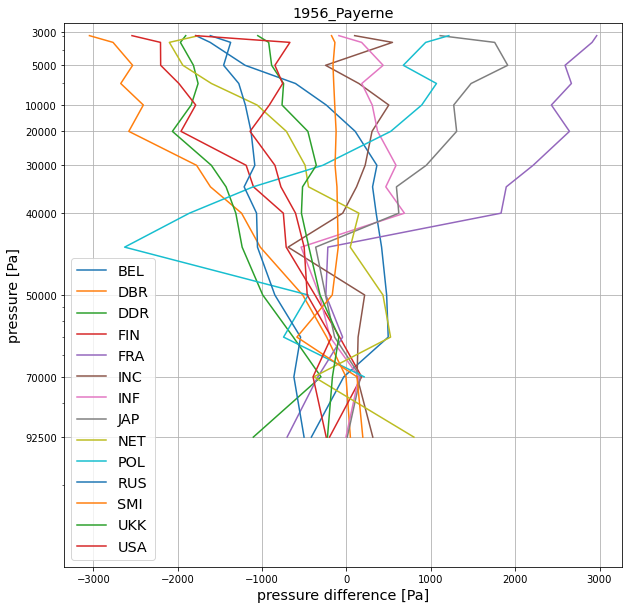

In [7]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,100,200,300,400,500,700,925])*100.
#     -
for i in range(len(means)):
    ax1.semilogy(newmeans[i], pressure_list)
ax1.set(xlabel ='pressure difference [Pa]', ylabel='pressure [Pa]', title=picname)
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format,np.flip(yplevs)),rotation='horizontal')
ax1.set_ylim(100000,1000)
for i in range(len(st)):
    st[i]= str.upper(st[i][-3:])
ax1.legend(st, loc='best')
ax1.invert_yaxis()
ax1.grid()
plt.show()